# 3.5 Tutorial

In this tutorial we will look at various figures created from the [Seaborn datasets](https://seaborn.pydata.org/generated/seaborn.load_dataset.html). Your task will be to improve them.

Tips:
1. Familiarise yourself with the underlying data
2. Are the figures using the right type of plot?
3. Check the axes, labels and titles
4. Are the colours and markers appropriate?

## Learning goals

* Understand how to use `pandas` to load and analyse data
* Learn how to use `matplotlib` and `seaborn` to create figures

### Relevant Python modules

You will need to install the following Python modules:
```bash
matplotlib
pandas
seaborn
```

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exercise 1

Let's look at the `iris` dataset and see how it is formatted

In [2]:
iris_df = sns.load_dataset("iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We'll look at the relationship between the `sepal_length` and `sepal_width` of the `iris` dataset. What are some ways we can improve this plot?

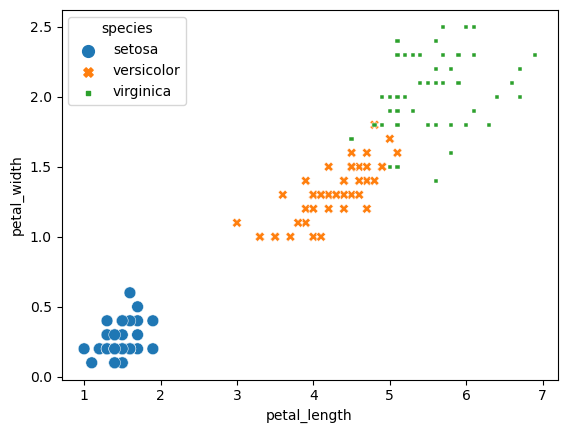

In [3]:
sns.scatterplot(x="petal_length", y="petal_width", data=iris_df, size="species", hue="species", style="species")
plt.show()

```{admonition} Suggested solution
:class: tip, dropdown

In the above graph, we can see there is a relationship between petal width and petal length. Width and length are also influenced by the species. However, there is redundant coding which can make it harder to read. We can improve this by just using `hue` to mark the different species - changing the size and markers are not necessary in this case.

The axes also do not contain the dimensions.
```

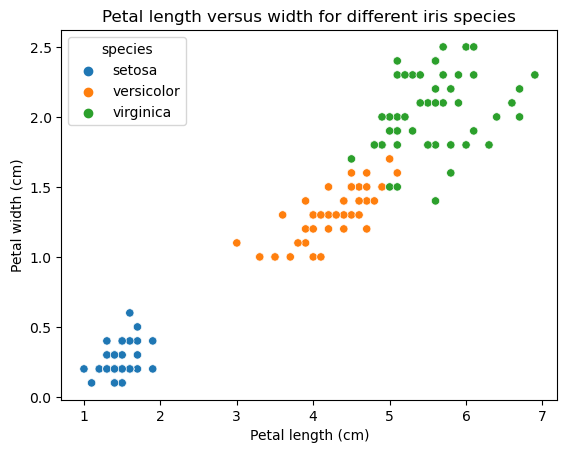

In [4]:
ax = sns.scatterplot(x="petal_length", y="petal_width", data=iris_df, hue="species")
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal length versus width for different iris species')
plt.show()

## Exercise 2

Let's look at the [penguins](https://github.com/allisonhorst/palmerpenguins/blob/main/README.md) dataset. The dataset records 344 penguins from different species.

In [5]:
penguins_df = sns.load_dataset("penguins")
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We'll compare bill length for each penguin species. What are some ways we can improve this plot?

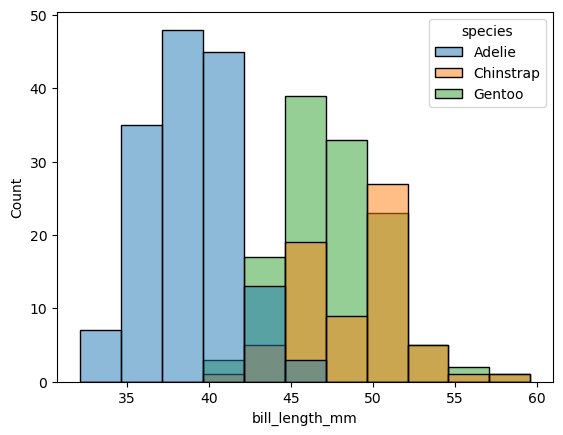

In [6]:
sns.histplot(data=penguins_df, x="bill_length_mm", hue="species")
plt.show()

```{admonition} Suggested solution
:class: tip, dropdown

Although bill length varies by species, there is a lot of overlap which makes it hard to distinguish. It would be better to separate the distributions. For example, you could create separate histograms. Alternatively, you might want to consider using a box plot.
```

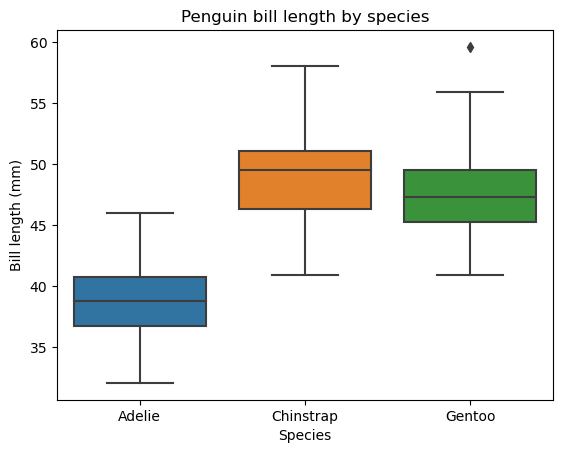

In [7]:
sns.boxplot(data=penguins_df, x="species", y="bill_length_mm")
plt.ylabel("Bill length (mm)")
plt.xlabel("Species")
plt.title("Penguin bill length by species")
plt.show()

## Exercise 3

Let's look at the `flights` dataset.

In [8]:
flights_df = sns.load_dataset("flights")
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


We'll analyse flight passenger number by time. How can we improve this plot?

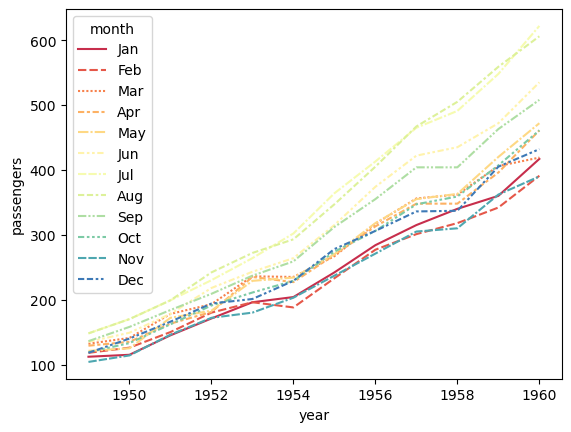

In [9]:
sns.lineplot(data=flights_df, x="year", y="passengers", hue="month", palette=sns.color_palette("Spectral", 12), style="month")
plt.show()

```{admonition} Suggested solution
:class: tip, dropdown

There's lots of information in this plot which makes it hard to read. We generally see a trend of increasing passenger numbers over time. If you want to analyse this in more detail, it might be better to look at a single month. Alternatively, we could aggregate the data by year and plot the average number of passengers per month.

The colours are also not very distinct. If you were to continue including different months, you might want to use a different colour palette and also remove the redundant styling of the lines.

Let's also add a title to make it more clear what the plot is showing. 
```

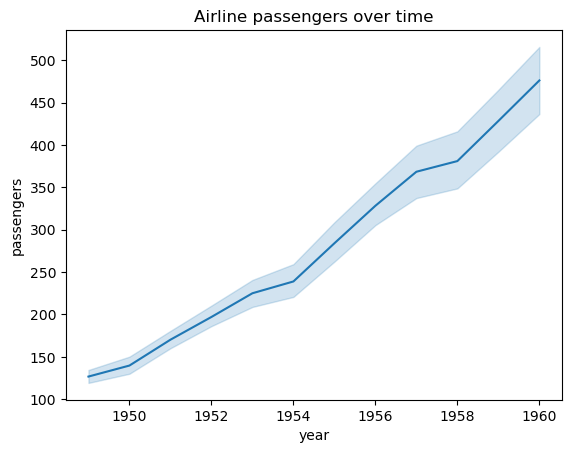

In [10]:
sns.lineplot(data=flights_df, x="year", y="passengers")
plt.title("Airline passengers over time")
plt.show()

## Exercise 4

We'll now look at the `glue` dataset. GLUE is a benchmark for training and evaluating natural language understanding systems. It consists of different tasks, including whether a sequence of words is a grammatical English sentence and comparing whether a pair of questions are semantically equivalent. More information can be found [here](https://gluebenchmark.com/).

The specific dataset records the performance of various models on the tasks.

In [11]:
glue_df = sns.load_dataset("glue")
glue_df.head()

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1


Let's compare the performance of the different models. How can we improve this plot?

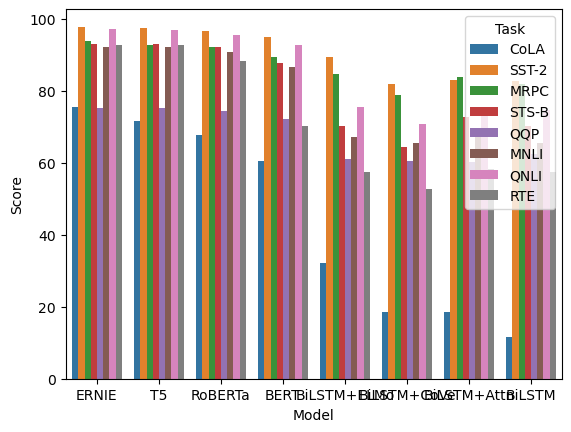

In [12]:
sns.barplot(data=glue_df, x="Model", y="Score", hue="Task")
plt.show()

```{admonition} Suggested solution
:class: tip, dropdown

There's a lot going on in this plot. You might want to consider whether all this information is necessary. One way to summarise the information is to combine the different tasks into one bar and use error bars. 

There's also not enough space to fit all of the x-axis labels and the legend overlaps some of the data. To fix this, you could rotate the plot, resize the figure, and/or move the legend out of the plot. 

Finally (this is optional and depends on what you want to highlight), if you want to emphasise the performance of the best model, you could reorder the bars. You could also use a different colour to highlight the best model.
```

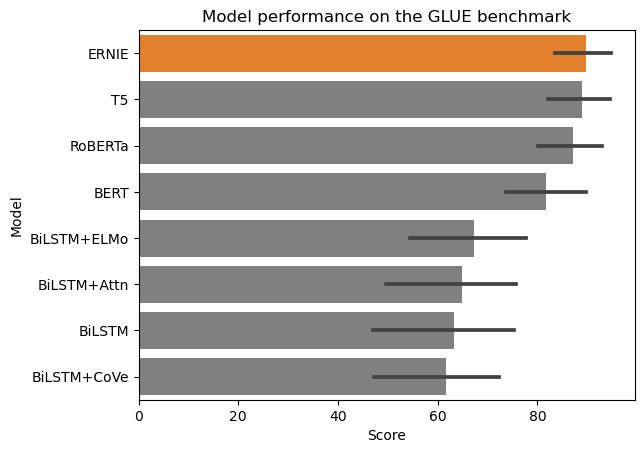

In [13]:
colours = ['tab:orange' if i == "ERNIE" else 'grey' for i in glue_df["Model"]]
sns.barplot(data=glue_df.sort_values(by=["Score"], ascending=False), y="Model", x="Score", palette=colours)
plt.title("Model performance on the GLUE benchmark")
plt.show()

## Exercise 5 (Optional)

Have a look at some of the other datasets available in Seaborn. The repository for all of the Seaborn examples are stored [here](https://github.com/mwaskom/seaborn-data). 

Load them into a dataframe and see if you could generate any tables that might be interesting.

Based on the tables, create some plots that might be useful for analysis. What would be the advantage of using a plot over a table, and how can you best emphasise the information you want to convey?

If you would like some feedback on your plots, you can share them on the [discussion forum](https://moodle.ucl.ac.uk/mod/forum/view.php?id=4149717).